In [ ]:
!pip install numpy pandas matplotlib tensorflow keras

Training data shape: (60000, 784)
Testing data shape: (10000, 784)
Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3288 - val_loss: 0.1450
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1354 - val_loss: 0.1134
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1109 - val_loss: 0.1007
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1009 - val_loss: 0.0957
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0961 - val_loss: 0.0923
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0930 - val_loss: 0.0897
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0902 - val_loss: 0.0878
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0883 - val_loss: 0.0858
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0864 - val_loss: 0.0854
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0855 - val_loss: 0.0835
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0842 - va

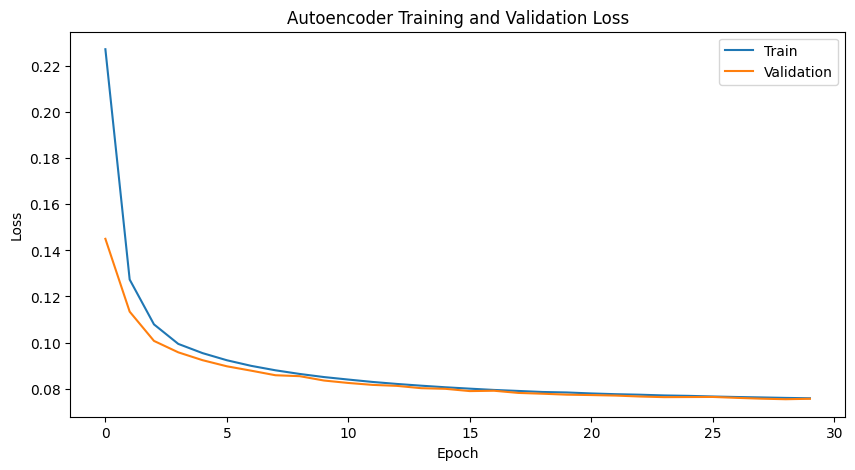

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


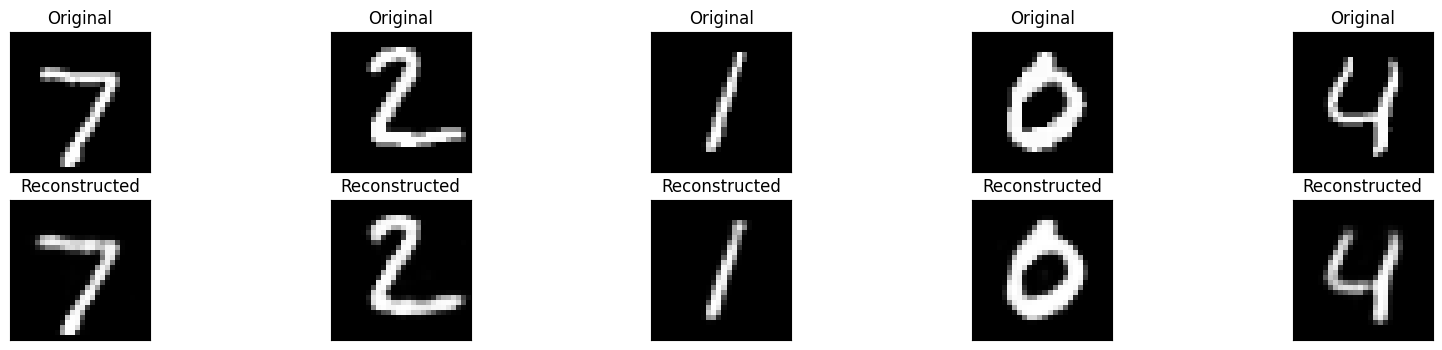

In [1]:
# Import necessary libraries
from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Define the Stacked Autoencoder Architecture
encoding_dim = 64
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create and compile the autoencoder
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                         epochs=30,
                         batch_size=256,
                         shuffle=True,
                         validation_data=(x_test, x_test))

# Plot training results
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Visualize reconstruction results
decoded_imgs = autoencoder.predict(x_test)

n = 5  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Reconstructed')

plt.show()